In [74]:
from pysentimiento import create_analyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df = pd.read_csv("../data/data.csv")

In [111]:
df = df.fillna('')
df["Date"] = pd.to_datetime(df["Date"].str.slice(0, -6), utc=True)

In [9]:
analyzer = create_analyzer("sentiment", "en")

In [65]:
df["Probs"] = analyzer.predict(df["Content"])

Map: 100%|██████████| 258176/258176 [00:07<00:00, 33665.17 examples/s]


In [66]:
df["Sentiment"] = df["Probs"].map(lambda x: x.output)

In [67]:
df["Value"] = df["Sentiment"].map(lambda x: {"NEG": -1, "NEU": 0, "POS": 1}[x])

In [76]:
time_df = time_df.set_index(df["Date"])

/tmp/ipykernel_635820/829438312.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_df["Value"].resample('M').mean().plot()


<Axes: xlabel='Date'>

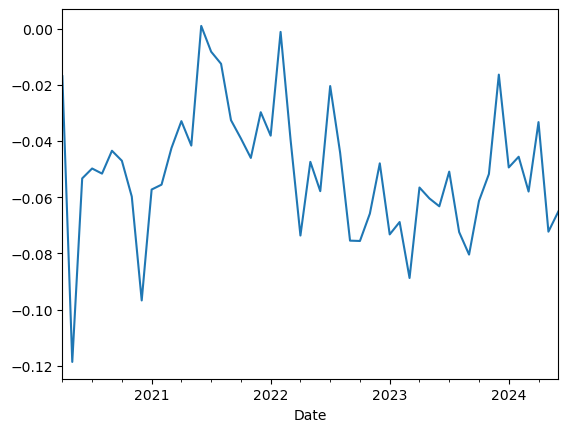

In [83]:
time_df["Value"].resample('M').mean().plot()

In [123]:
time_df['Date'].dt.hour

Date
2023-12-30 16:27:10.184    16
2023-12-30 18:51:37.093    18
2023-12-30 18:51:41.366    18
2023-12-30 19:07:45.001    19
2023-12-30 19:07:50.175    19
                           ..
2024-04-05 12:20:26.730    12
2024-04-05 12:20:30.814    12
2024-04-05 12:20:34.427    12
2024-04-05 12:21:01.593    12
2024-04-05 12:38:54.898    12
Name: Date, Length: 258176, dtype: int32

In [124]:
time_df['Hour'] = time_df['Date'].dt.hour

<Axes: xlabel='Hour'>

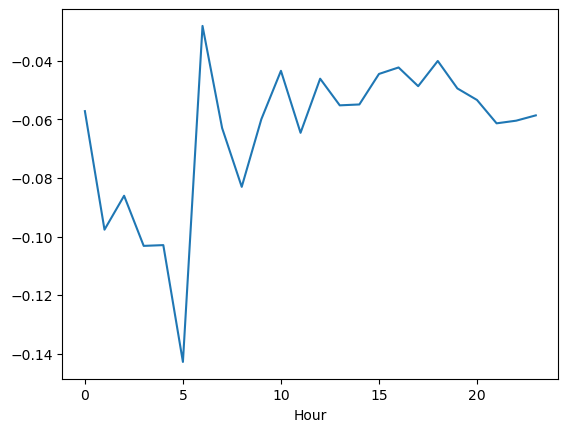

In [125]:
time_df.groupby("Hour")["Value"].mean().plot()